In [17]:
import numpy as np
from MountainCarEnv import MountainCarEnv
import matplotlib.pyplot as plot

In [18]:
env = MountainCarEnv(render_mode="rbg_array")

In [19]:
pos_space = np.linspace(env.min_position, env.max_position, 20)
vel_space = np.linspace(-env.max_speed, env.max_speed, 20)
Q = np.zeros((len(pos_space), len(vel_space), env.action_space.n))


In [20]:
def epsilon_greedy_policy(state, Q, epsilon):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state[0], state[1]])
    return action

def get_state(obs):
    pos, vel = obs
    pos_bin = np.digitize(pos, pos_space)
    vel_bin = np.digitize(vel, vel_space)
    return pos_bin, vel_bin

def run_mountain_car(Q, epsilon, alpha, gamma):
    done = False
    totalReward = 0
    obs = env.reset()
    state = get_state(obs)
    while not done:
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, done, _ = env.step(action)
        totalReward += reward
        newState = get_state(obs)
        delta = alpha * (reward + gamma * np.max(Q[newState[0], newState[1]]) - Q[state[0], state[1], action])
        Q[state[0], state[1], action] += delta
        state = newState
    return totalReward



In [21]:
numOfEpisodes = 20000
printInterval = 100

epsilon=0.9
reduction = epsilon/numOfEpisodes

alpha=0.1
gamma=0.999

totalRewards = np.zeros(numOfEpisodes)

for i in range(numOfEpisodes):
    totalReward = run_mountain_car(Q, epsilon, alpha, gamma)
    totalRewards[i] = totalReward
    if epsilon > 0.01:
        epsilon -= reduction
    if (i+1) % printInterval == 0:
        print(f"Episode {i+1} out of {numOfEpisodes}; Reward {np.mean(totalReward)}; Epsilon {epsilon}")



Episode 100 out of 20000; Reward -500.0; Epsilon 0.8955000000000038
Episode 200 out of 20000; Reward -500.0; Epsilon 0.8910000000000077
Episode 300 out of 20000; Reward -500.0; Epsilon 0.8865000000000115
Episode 400 out of 20000; Reward -500.0; Epsilon 0.8820000000000153
Episode 500 out of 20000; Reward -500.0; Epsilon 0.8775000000000192
Episode 600 out of 20000; Reward -500.0; Epsilon 0.873000000000023
Episode 700 out of 20000; Reward -500.0; Epsilon 0.8685000000000268
Episode 800 out of 20000; Reward -500.0; Epsilon 0.8640000000000306
Episode 900 out of 20000; Reward -500.0; Epsilon 0.8595000000000345
Episode 1000 out of 20000; Reward -500.0; Epsilon 0.8550000000000383
Episode 1100 out of 20000; Reward -500.0; Epsilon 0.8505000000000421
Episode 1200 out of 20000; Reward -500.0; Epsilon 0.8460000000000459
Episode 1300 out of 20000; Reward -381.0; Epsilon 0.8415000000000498
Episode 1400 out of 20000; Reward -500.0; Epsilon 0.8370000000000536
Episode 1500 out of 20000; Reward -500.0; Ep

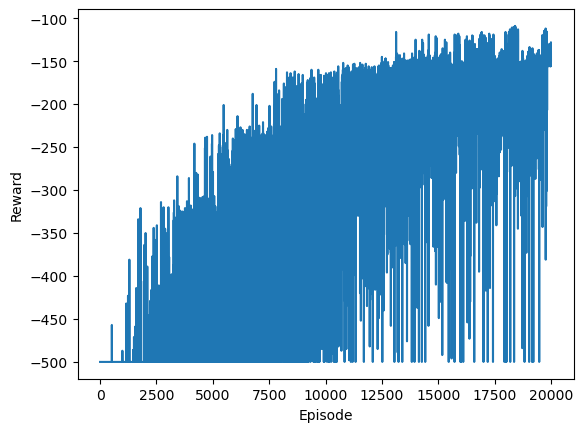

In [22]:

plot.plot(totalRewards)
plot.xlabel("Episode")
plot.ylabel("Reward")
plot.show()
plot.close()